In [1]:
from commonfunctions import *
%matplotlib inline
import cv2 as cv


In [13]:
def myHistogram(gray_image):
    hist = np.zeros(257)
    for i in gray_image:
        for j in i:
            hist[j] += 1
    return hist

In [14]:
def mythreshold(gray_image):
    margin = 30
    # imgHist = histogram(gray_image, nbins=256)[0]
    imgHist = myHistogram(gray_image=gray_image)
    maxIndex = np.argmax(imgHist)
    print(maxIndex)

    indexleft = 0
    if maxIndex > margin:
        indexleft = np.argmax(imgHist[:maxIndex-margin])

    indexRight = 256
    if 256 - maxIndex > margin:
        indexRight = maxIndex + margin + np.argmax(imgHist[maxIndex+margin:255])

    if imgHist[indexleft] > imgHist[indexRight]:
        return indexleft + np.argmin(imgHist[indexleft:maxIndex])
    elif indexRight != maxIndex:
        return maxIndex + np.argmin(imgHist[maxIndex:indexRight])
    else: 
        return maxIndex

192


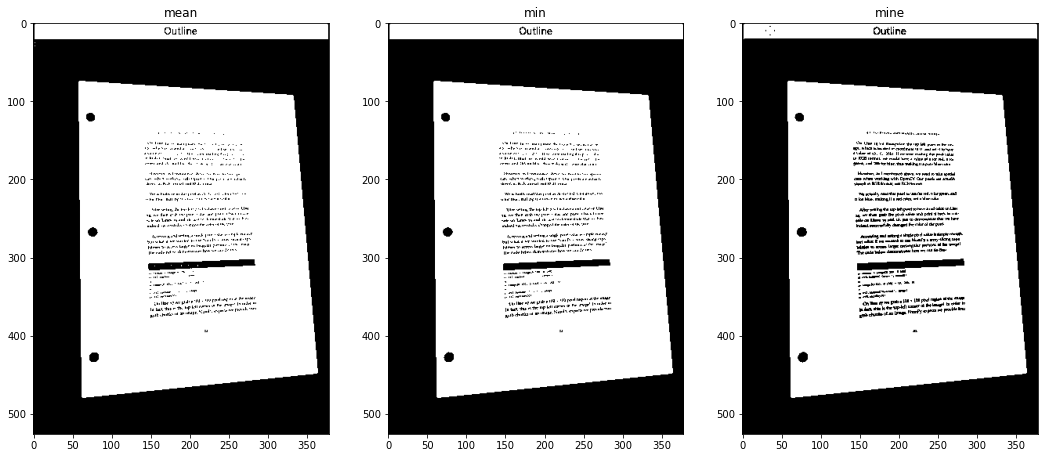

234


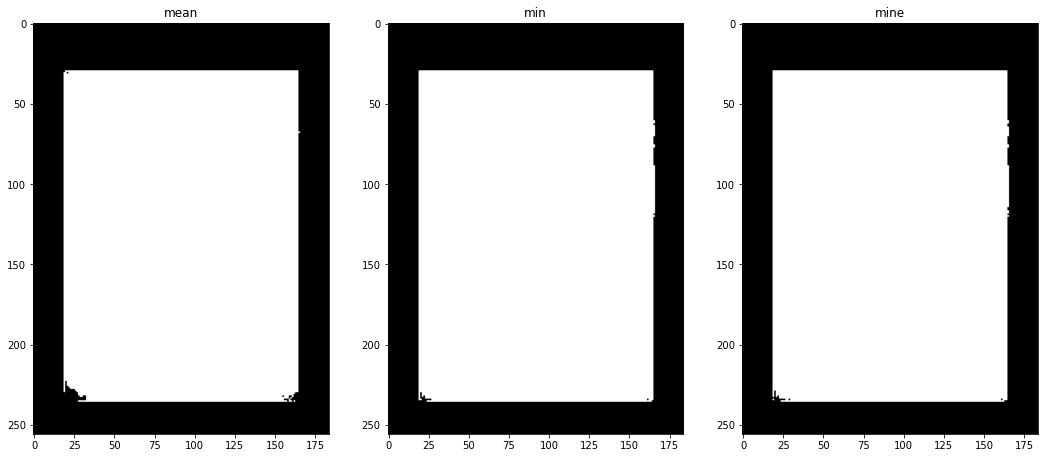

7


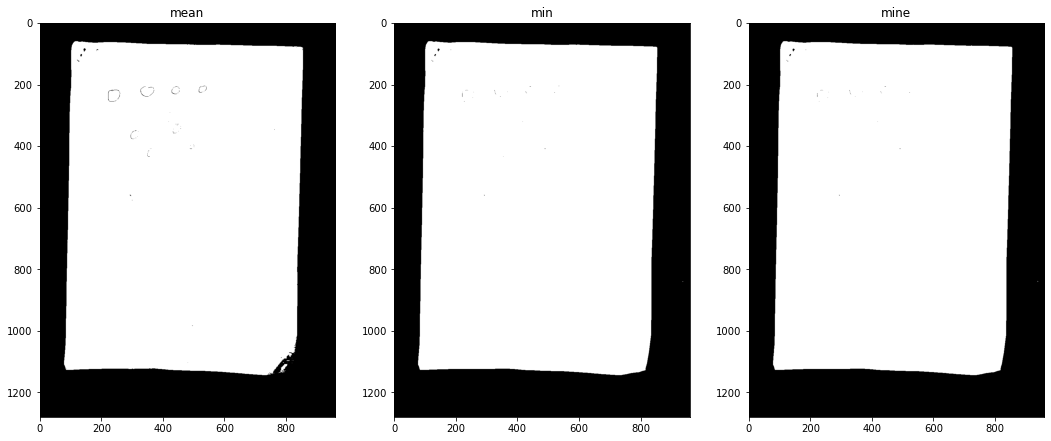

207


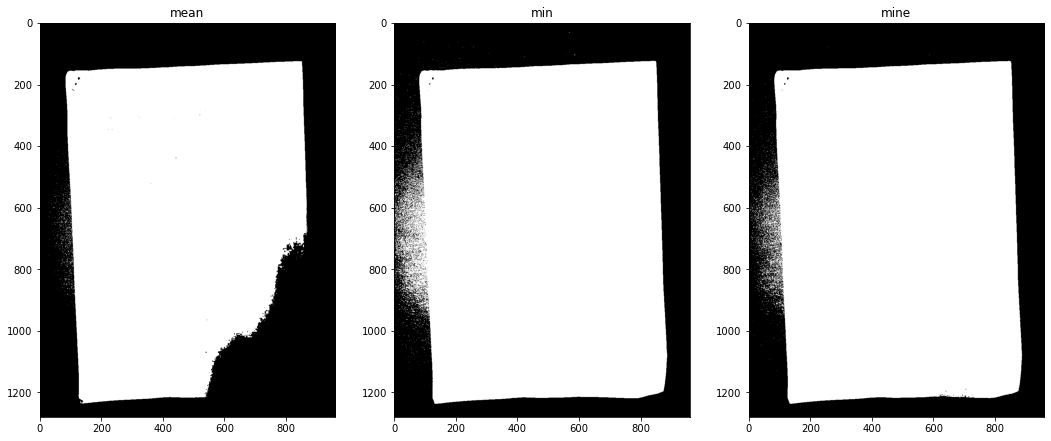

256


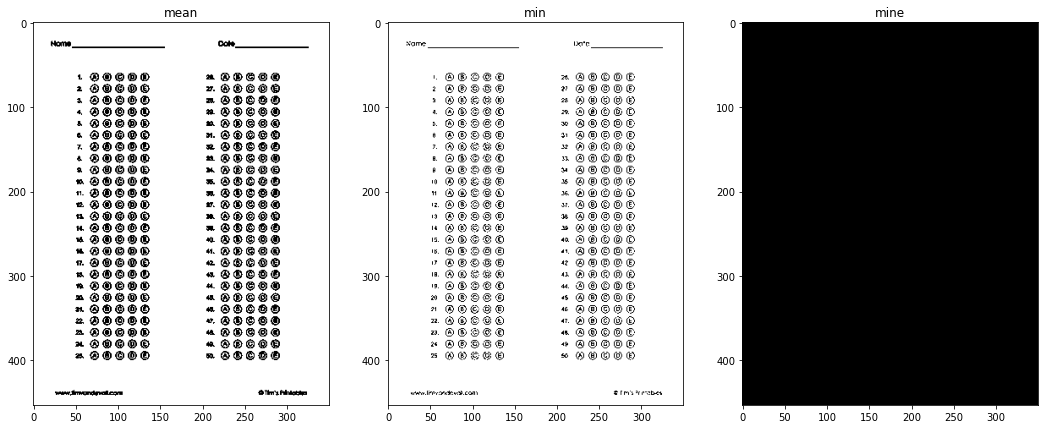

19


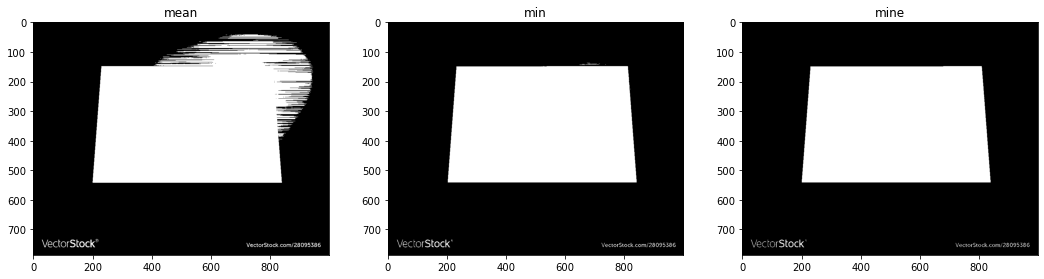

FileNotFoundError: No such file: 'e:\Collage\third year\image processing\Image_project\project_img\Bubble-Sheet-Checker\imgs\7.jpg'

In [17]:
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_mean,threshold_minimum

for i in range(1,8):
    image = io.imread("imgs/"+ str(i) + ".jpg")
    gray_image = np.round(rgb2gray(image)*256).astype(int)

    ax = threshold_mean(gray_image)
    ay = threshold_minimum(gray_image)
    az = mythreshold(gray_image)
    show_images([gray_image> ax,gray_image>ay,gray_image>az],titles= ["mean","min","mine"])

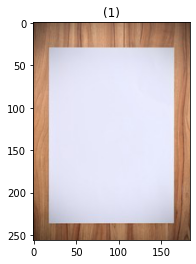

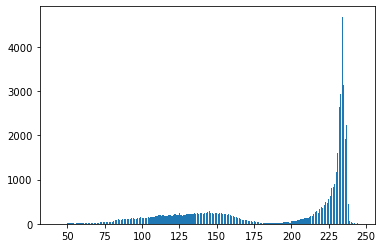

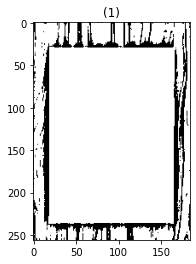

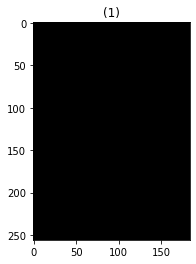

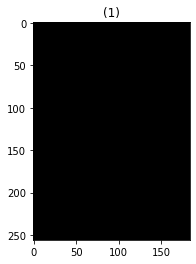

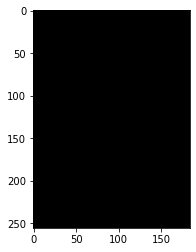

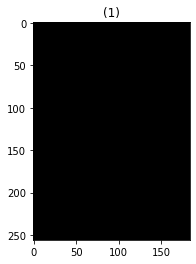

In [ ]:
image = io.imread("imgs/2.jpg")

show_images([image])
orignal_image = image.copy()

gray_image = np.round(rgb2gray(image)*256).astype(int)

showHist(gray_image)

threshold = threshold_local(gray_image,35, offset=10)
gray_image =gray_image >threshold
show_images([gray_image])


gray_image = gray_image > threshold
dia_SE = np.ones((16, 16))
#Bluured_image  = gaussian(gray_image, sigma=1,  mode='nearest')
opening = binary_dilation(binary_erosion(gray_image, dia_SE), dia_SE)
closing = binary_erosion(binary_dilation(opening, dia_SE), dia_SE)
show_images([closing])
edged = canny(closing, sigma=3)
# show the original image and the edge detected image
show_images([edged])


bounding_boxes = find_contours(edged, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(edged, cmap=plt.cm.gray)
blank = np.zeros(gray_image.shape)

for contour in bounding_boxes:
    x_diff = contour[:, 1].max() - contour[:, 1].min()
    y_diff = contour[:, 0].max() - contour[:, 0].min()
# #     print(x_diff,y_diff)
#     if( x_diff >= image.shape[1] // 5  or y_diff >= image.shape[0]//5 ):
# #       print('hi')
    for i in contour[:, 0]:
        for j in contour[:, 1]:
            # print(i,j)
            blank[int(i)][int(j)] = 1
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='green')
show_images([blank])


STEP 1: Edge Detection


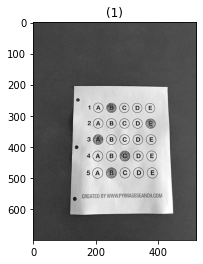

In [4]:
## open cv 
image = cv.imread("imgs/7.png")
orignalImage = image.copy()

## convert image into grey scale
grayImage = cv.cvtColor(orignalImage, cv.COLOR_BGR2GRAY)

## structure element
SE =np.ones((5,5),np.uint8)
# opening
openingImage = cv.morphologyEx(grayImage, cv.MORPH_OPEN, SE)
# followed by closing with same SE
closingImage = cv.morphologyEx(openingImage, cv.MORPH_CLOSE, SE)

#cv.calcHist(images, channels, mask, histSize, ranges)


# show the original image and the edge detected image
print("STEP 1: Edge Detection")
show_images([grayImage])
# cv.waitKey(0)
# cv.destroyAllWindows()